In [1]:
bodies = ["Sun", "Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]
masses = [1.989e30 ,0.330e24,4.87e24,5.97e24,0.642e24,1898e24,568e24,86.8e24,102e24,0.0146e24]
x = [0., -1.407280799640445E-01 , -7.186302169039649E-01, -1.685246489174995E-01, 1.390361066087240E+00, 4.003460488693537E+00, 6.408556036146941E+00, 1.443051758274212E+01, 1.681075772645494E+01, -9.876867451525346E+00]
y = [0., -4.439009577663330E-01, -2.250380105571625E-02, 9.687833048228511E-01, -2.100972123734226E-02, 2.935353187887882E+00, 6.568042755297438E+00, -1.373565828163257E+01, -2.499265127854257E+01, -2.795802118693108E+01] 
z = [0., -2.334555971312334E-02, 4.117184137682463E-02, -4.120973411130758E-06, -3.461801385164819E-02, -1.018230443988181E-01, -3.691272890761793E-01, -2.474809404498369E-05, 1.272705717438095E-01, 5.850814657388042E+00]
vx = [0., 2.116887137167173E-02, 5.135327579269579E-04, -1.723394583068879E-02, 7.479271243289054E-04, -4.563750795379206E-03, -4.290540499848893E-03, 2.678466083136532E-03, 2.579216849517761E-03, 3.039016380795775E-03]
vy = [0., -7.097975438870807E-03, -2.030614162239802E-02, -3.007660259271771E-03, 1.518629867736057E-02, 6.447274222742638E-03, 3.891990891483582E-03, 2.672427506613704E-03, 1.776355179608279E-03, -1.529879110198215E-03]
vz = [0., -2.522830951443754E-03, -3.071745100210852E-04, 3.562931614781975E-08, 2.997531995727463E-04, 7.547009668026901E-05, 1.026097521772974E-04, -2.474809404498369E-05, -9.620004658366438E-05, -7.172417049506235E-04]
def init_cond(bodies,x,y,z,vx,vy,vz,masses):
    # x,y,z in AU and vx,vy,vz in AU/d
    init_cond_array = []
    for n in range(len(bodies)):
            init_cond_array.append((bodies[n],x[n],y[n],z[n],vx[n],vy[n],vz[n],masses[n]))
    return init_cond_array

##index bodies = sun 0, mercury 1, venus 2, earth 3, mars 4, jupiter 5, saturn 6, uranus 7 , neptune 8, pluto 9
## index data = name 0, x 1, y 2, z 3, vx 4, vy 5, vz 6, masses 7
## example : x velocity jupiter = array[5][4]
array = init_cond(bodies,x,y,z,vx,vy,vz,masses)
#print(array)
#print(array[5][4])

In [2]:
import numpy as np

G = 6.67408e-11 /( (1.496e+11)**3 * (1.15741e-5)**2 )   # Conversion of m^3 kg^-1 s^-2 to AU^3 kg^-1 d^-2

def gravitational_accel(j,pos,masses):
    """returns acceleration vector of object 'j' in the form [a_x,a_y,a_z].
    Variable 'pos' is of the from '[[x1,y1,z1],[x2,y2,z2],...]'.
    Variable 'masses' is of the form '[mass1,mass2,...]'
    """
    
    a = np.zeros(3)   # a = [0,0,0]
    
    for i in range(len(masses)):
        if i!=j:
            a += G*masses[i]*(pos[i]-pos[j])/np.sum((pos[i]-pos[j])**2)**1.5
    return a

def RK_k(k_prev,self,over2=1):
    """Function to calculate k2, k3, k4 from Runge-Kutta.
    """
    acc_array_k = np.zeros((len(k_prev),3))
    if over2==1:
        for i, b in enumerate(self.bodies):
            acc_k = gravitational_accel(i,old_posarray+dt*k_prev/2,massarray)
            acc_array_k[i] = acc_k
    if over2==0:
        for i, b in enumerate(self.bodies):
            acc_k = gravitational_accel(i,old_posarray+dt*k_prev,massarray)
            acc_array_k[i] = acc_k
    return acc_array_k

In [3]:
posarray = np.empty([len(bodies),3])
velarray = np.empty([len(bodies),3])
massarray = np.empty(len(bodies))
for j in range(len(bodies)):
    array = init_cond(bodies,x,y,z,vx,vy,vz,masses)[j]
    poslist = array[1:4]
    vellist = array[4:7]
    masslist = array[7]
    posarray[j] = poslist
    velarray[j] = vellist
    massarray[j] = masslist

In [4]:
x_over_time = np.array([])
y_over_time = np.array([])
z_over_time = np.array([])
for i in range(len(posarray)):
    x_over_time = np.append(x_over_time,posarray[i][0])
    y_over_time = np.append(y_over_time,posarray[i][1])
    z_over_time = np.append(z_over_time,posarray[i][2])

In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


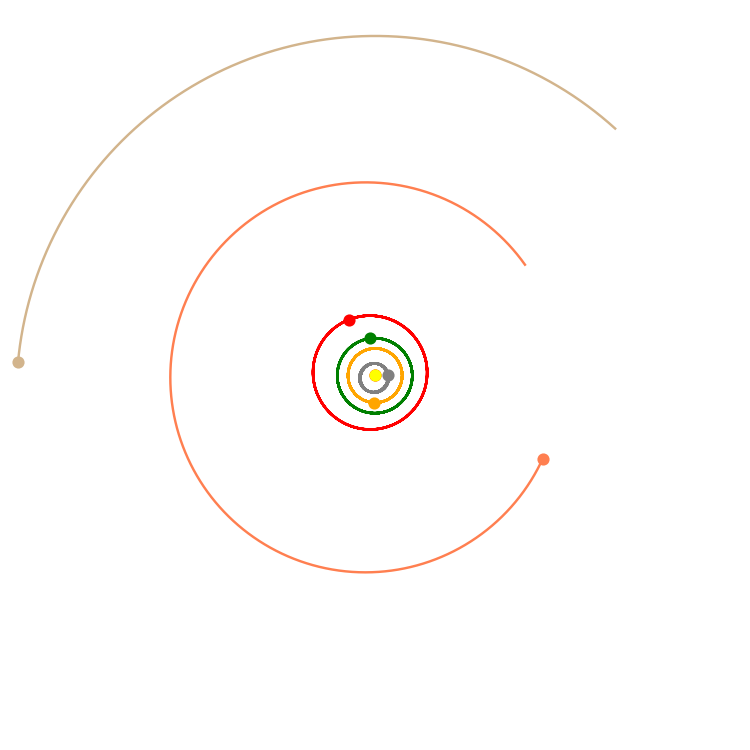

10


In [6]:
"""Runge-Kutta integration, heliocentric"""
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import date, datetime, timedelta

t = 3650   # 3650 = 10 years

new_posarray = posarray.copy()
old_posarray = posarray.copy()
new_velarray = velarray.copy()

class Object:
    def __init__(self, name, color, pos, vel):
        self.name = name
        self.pos    = np.array(pos, dtype=np.float)
        self.vel    = np.array(vel, dtype=np.float)
        self.x = []
        self.y = []
        self.z = []
        self.plot = ax.scatter(pos[0], pos[1], color=color)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)
        
class SolarSystem:
    def __init__(self, center):
        self.center = center
        self.bodies = []
        ###self.time = None
        #self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, body):
        self.bodies.append(body)
    def evolve(self): # evolve the trajectories
        
        dt = 1
        #self.time += timedelta(dt)
        plots = []
        lines = []
        k1 = new_velarray
        
        k2 = np.zeros((len(k1),3))
        k3 = np.zeros((len(k1),3))
        k4 = np.zeros((len(k1),3))
        
        k2 = new_velarray + RK_k(k1,1,self)*dt/2
        k3 = new_velarray + RK_k(k2,1,self)*dt/2
        k4 = new_velarray + RK_k(k3,0,self)*dt
        
        for i, b in enumerate(self.bodies):
            
            new_posarray[i] = old_posarray[i] + dt*(k1[i] + 2*k2[i] + 2*k3[i] + k4[i])/6
            new_posarray[i] -= new_posarray[0]   # subtract movement of the Sun (experimental)
            #new_posarray[i] -= new_posarray[3]   # Geocentric
            old_posarray[i] = new_posarray[i]
            
            acc = gravitational_accel(i,new_posarray,massarray)
            new_velarray[i] += acc*dt
        
        #new_new_posarray = new_posarray.copy()
        #for i, b in enumerate(self.bodies):
            #new_new_posarray[i] = new_posarray[i] - new_posarray[3]   # Geocentric
            
#             x_over_time[i] = np.append(x_over_time[i],new_posarray[i][0])
#             y_over_time[i] = np.append(y_over_time[i],new_posarray[i][1])
#             z_over_time[i] = np.append(z_over_time[i],new_posarray[i][2])
            
            b.x.append(new_posarray[i][0])
            b.y.append(new_posarray[i][1])
            b.z.append(new_posarray[i][2])
        
            b.plot.set_offsets(new_posarray[i][:2])
            plots.append(b.plot)
            b.line.set_xdata(b.x)
            b.line.set_ydata(b.y)
            lines.append(b.line)
        #if len(b.x) > 10000:
            #raise SystemExit("Stopping after a long run to prevent memory overflow")
        #self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        #print(len(b.x))
        
        global x_over_time
        global y_over_time
        global z_over_time
        for i in range(len(new_posarray)):
            x_over_time = np.append(x_over_time,new_posarray[i][0])
            y_over_time = np.append(y_over_time,new_posarray[i][1])
            z_over_time = np.append(z_over_time,new_posarray[i][2])
#         print(len(x_over_time)/len(new_posarray))
        return plots + lines #+ [self.timestamp]

# x_over_time = posarray[:][0].copy()
# y_over_time = np.array([])
# z_over_time = np.array([])

fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-10, 10), ylim=(-10,10))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun",'red', [0., 0., 0.], [0., 0., 0.]))
body_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   # The 1st, 2nd, 3rd, and 4th planet in solar system
colors = ['yellow', 'grey', 'orange','green','red','coral','tan','aqua','blue','maroon']
for i, body_number in enumerate(body_numbers):
    ss.add_planet(Object(body_number, colors[i], posarray[i], velarray[i]))

def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=t, blit=True, interval=1,)
plt.show()
# ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)
print(len(x_over_time))

In [7]:
x_over_time_shaped = np.reshape(x_over_time,(int(len(x_over_time)/len(new_posarray)),len(new_posarray)))
y_over_time_shaped = np.reshape(y_over_time,(int(len(y_over_time)/len(new_posarray)),len(new_posarray)))
z_over_time_shaped = np.reshape(z_over_time,(int(len(z_over_time)/len(new_posarray)),len(new_posarray)))

print(x_over_time_shaped)
print()
print(np.shape(x_over_time_shaped))

[[ 0.         -0.14072808 -0.71863022 ... 14.43051758 16.81075773
  -9.87686745]
 [ 0.         -0.11955921 -0.71811668 ... 14.43319605 16.81333694
  -9.87382844]
 [ 0.         -0.09804354 -0.717035   ... 14.43587397 16.81591598
  -9.87078931]
 ...
 [ 0.          0.34211771 -0.07543647 ... 20.01642111 24.79243285
   1.6360284 ]
 [ 0.          0.34155249 -0.05572354 ... 20.01668595 24.7941731
   1.63922547]
 [ 0.          0.33853679 -0.03596952 ... 20.01695004 24.79591307
   1.64242253]]

(3652, 10)


In [8]:
import ipyvolume.pylab as plt3d
import numpy as np

new_posarray = posarray.copy()
old_posarray = posarray.copy()
new_velarray = velarray.copy()

plt3d.figure()

N= 10
t = np.linspace(0,N,N+1)

s = plt3d.scatter(x_over_time_shaped, y_over_time_shaped, z_over_time_shaped, marker="sphere", size=2)
plt3d.animate_glyphs(s, interval=150)
plt3d.xyzlim(-100, 100)
plt3d.show()

/Software/users/modules/7/software/anaconda3/2019.10/lib/python3.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: Please use animation_control(...)


# Breakline

In [ ]:
# import ipyvolume.pylab as plt3d
# import numpy as np
# from matplotlib.pyplot import figure, show

# new_posarray = posarray.copy()
# old_posarray = posarray.copy()
# new_velarray = velarray.copy()

# plt3d.figure()

# N = 10
# t = np.linspace(0,N,N+1)

# # fig = plt.figure(figsize=[6, 6])
# # ax = plt.axes([0., 0., 1., 1.], xlim=(-10, 10), ylim=(-10,10))
# # ax.set_aspect('equal')
# # ax.axis('off')
# ss = SolarSystem(Object("Sun",'red', [0., 0., 0.], [0., 0., 0.]))
# body_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   # The 1st, 2nd, 3rd, and 4th planet in solar system
# colors = ['yellow', 'grey', 'orange','green','red','coral','tan','aqua','blue','maroon']
# for i, body_number in enumerate(body_numbers):
#     ss.add_planet(Object(body_number, colors[i], posarray[i], velarray[i]))

# for j in range(N):
#     ss.evolve()

# x_over_time_shaped = np.reshape(x_over_time,(int(len(x_over_time)/len(new_posarray)),len(new_posarray)))
# y_over_time_shaped = np.reshape(y_over_time,(int(len(y_over_time)/len(new_posarray)),len(new_posarray)))
# z_over_time_shaped = np.reshape(z_over_time,(int(len(z_over_time)/len(new_posarray)),len(new_posarray)))

# print(x_over_time_shaped)
# print(np.shape(x_over_time_shaped))

# # for b in ss.bodies:
# # for k in range(len(x_over_time_shaped)):
# for k in range(100):
#     s = plt3d.scatter(x_over_time_shaped[k], y_over_time_shaped[k], z_over_time_shaped[k], marker="sphere", size=2)
# plt3d.animate_glyphs(s, interval=150)
# plt3d.xyzlim(-100, 100)
# plt3d.show()

In [ ]:
# """Runge-Kutta integration, heliocentric"""
# import json
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# from datetime import date, datetime, timedelta

# t = 3650   # 3650 = 10 years

# class Object:
#     def __init__(self, name, color, pos, vel):
#         self.name = name
#         self.pos    = np.array(pos, dtype=np.float)
#         self.vel    = np.array(vel, dtype=np.float)
#         self.x = []
#         self.y = []
#         self.z = []
#         self.plot = ax.scatter(pos[0], pos[1], color=color)
#         self.line, = ax.plot([], [], color=color, linewidth=1.4)
        
# class SolarSystem:
#     def __init__(self, center):
#         self.center = center
#         self.bodies = []
#         ###self.time = None
#         #self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
#     def add_planet(self, body):
#         self.bodies.append(body)
#     def evolve(self): # evolve the trajectories
        
#         dt = 1
#         #self.time += timedelta(dt)
#         plots = []
#         lines = []
#         k1 = new_velarray
        
#         k2 = np.zeros((len(k1),3))
#         k3 = np.zeros((len(k1),3))
#         k4 = np.zeros((len(k1),3))
        
#         k2 = new_velarray + RK_k(k1,1,self)*dt/2
#         k3 = new_velarray + RK_k(k2,1,self)*dt/2
#         k4 = new_velarray + RK_k(k3,0,self)*dt
        
#         for i, b in enumerate(self.bodies):
            
#             new_posarray[i] = old_posarray[i] + dt*(k1[i] + 2*k2[i] + 2*k3[i] + k4[i])/6
#             new_posarray[i] -= new_posarray[0]   # subtract movement of the Sun (experimental)
#             #new_posarray[i] -= new_posarray[3]   # Geocentric
#             old_posarray[i] = new_posarray[i]
            
#             acc = gravitational_accel(i,new_posarray,massarray)
#             new_velarray[i] += acc*dt
        
#         #new_new_posarray = new_posarray.copy()
#         #for i, b in enumerate(self.bodies):
#             #new_new_posarray[i] = new_posarray[i] - new_posarray[3]   # Geocentric
            
#             b.x.append(new_posarray[i][0])
#             b.y.append(new_posarray[i][1])
#             b.z.append(new_posarray[i][2])
        
#             b.plot.set_offsets(new_posarray[i][:2])
#             plots.append(b.plot)
#             b.line.set_xdata(b.x)
#             b.line.set_ydata(b.y)
#             lines.append(b.line)
#         #if len(b.x) > 10000:
#             #raise SystemExit("Stopping after a long run to prevent memory overflow")
#         #self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
#         #print(len(b.x))
#         return plots + lines #+ [self.timestamp]

# new_posarray = posarray.copy()
# old_posarray = posarray.copy()
# new_velarray = velarray.copy()


# fig = plt.figure(figsize=[6, 6])
# ax = plt.axes([0., 0., 1., 1.], xlim=(-10, 10), ylim=(-10,10))
# ax.set_aspect('equal')
# ax.axis('off')
# ss = SolarSystem(Object("Sun",'red', [0., 0., 0.], [0., 0., 0.]))
# body_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   # The 1st, 2nd, 3rd, and 4th planet in solar system
# colors = ['yellow', 'grey', 'orange','green','red','coral','tan','aqua','blue','maroon']
# for i, body_number in enumerate(body_numbers):
#     ss.add_planet(Object(body_number, colors[i], posarray[i], velarray[i]))

# def animate(i):
#     return ss.evolve()
# ani = animation.FuncAnimation(fig, animate, repeat=False, frames=t, blit=True, interval=1,)
# plt.show()
# # ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)

In [ ]:
"""Runge-Kutta integration, geocentric"""
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import date, datetime, timedelta

t = 3650   # 3650 = 10 years

class Object:
    def __init__(self, name, color, pos, vel):
        self.name = name
        self.pos    = np.array(pos, dtype=np.float)
        self.vel    = np.array(vel, dtype=np.float)
        self.x = []
        self.y = []
        self.z = []
        self.plot = ax.scatter(pos[0], pos[1], color=color)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)
        
class SolarSystem:
    def __init__(self, center):
        self.center = center
        self.bodies = []
        ###self.time = None
        #self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, body):
        self.bodies.append(body)
    def evolve(self): # evolve the trajectories
        
        dt = 1
        #self.time += timedelta(dt)
        plots = []
        lines = []
        k1 = new_velarray
        
        k2 = np.zeros((len(k1),3))
        k3 = np.zeros((len(k1),3))
        k4 = np.zeros((len(k1),3))
        
        k2 = new_velarray + RK_k(k1,1,self)*dt/2
        k3 = new_velarray + RK_k(k2,1,self)*dt/2
        k4 = new_velarray + RK_k(k3,0,self)*dt
        
        for i, b in enumerate(self.bodies):
            
            new_posarray[i] = old_posarray[i] + dt*(k1[i] + 2*k2[i] + 2*k3[i] + k4[i])/6
            #new_posarray[i] -= new_posarray[0]   # subtract movement of the Sun (experimental)
            #new_posarray[i] -= new_posarray[3]   # Geocentric
            old_posarray[i] = new_posarray[i]
            
            acc = gravitational_accel(i,new_posarray,massarray)
            new_velarray[i] += acc*dt
        
        new_new_posarray = new_posarray.copy()
        for i, b in enumerate(self.bodies):
            new_new_posarray[i] -= new_posarray[3]   # Geocentric
            
            b.x.append(new_new_posarray[i][0])
            b.y.append(new_new_posarray[i][1])
            b.z.append(new_new_posarray[i][2])
        
            b.plot.set_offsets(new_new_posarray[i][:2])
            plots.append(b.plot)
            b.line.set_xdata(b.x)
            b.line.set_ydata(b.y)
            lines.append(b.line)
        #if len(b.x) > 10000:
            #raise SystemExit("Stopping after a long run to prevent memory overflow")
        #self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        #print(len(b.x))
        return plots + lines #+ [self.timestamp]


new_posarray = posarray.copy()
old_posarray = posarray.copy()
new_velarray = velarray.copy()


fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-10, 10), ylim=(-10,10))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun",'red', [0., 0., 0.], [0., 0., 0.]))
body_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   # The 1st, 2nd, 3rd, and 4th planet in solar system
colors = ['yellow', 'grey', 'orange','green','red','coral','tan','aqua','blue','maroon']
for i, body_number in enumerate(body_numbers):
    ss.add_planet(Object(body_number, colors[i], posarray[i], velarray[i]))

def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=t, blit=True, interval=1,)
plt.show()
# ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)

In [ ]:
"""Plots of distances between objects and the Sun"""
from numpy import linspace
from matplotlib.pyplot import figure, show

time = 365

N= 10*365
t = linspace(0,N,N+1)
def makeFig(i, objectNames, x0, y0, z0):
    #print(len(x0))
    r = (x0**2 + y0**2 + z0**2)**0.5   # distance of an object to the Sun
    fig = figure(figsize=[10, 5])
    frame = fig.add_subplot(1, 1, 1)
    frame.plot(t, r, 'r', alpha=0.3)#, label=f'x{i}')
    frame.set_xlabel('time [days]')
    frame.set_xticks(linspace(min(t), max(t), 21))
    frame.set_ylabel('amplitude')
    frame.set_title(objectNames[i])
    frame.axis('auto')
    frame.grid()
    frame.legend()
    fig.autofmt_xdate()
for j in range(N):
    ss.evolve()
    #print(new_posarray)
for idx, b in enumerate(ss.bodies):
    makeFig(idx, bodies, np.array(b.x), np.array(b.y), np.array(b.z))
show()

In [ ]:
np.linspace(1,15,15)

In [ ]:
test = np.array([])
if not test.any():
    print(test)
test = np.append(test,3)
if not test.any():
    print(test)
test = np.append(test,5)
if not test.any():
    print(test)

In [ ]:
print(np.concatenate(([1,2,3],[4,5,6])))

In [ ]:
import ipyvolume.pylab as plt3d
import numpy as np

test = np.array([[1,2,3,4,5,6,7,8,9,10],[1,4,9,16,25,36,49,64,81,100],[2,4,6,8,10,10,8,6,4,2]])
# test = np.array([[1,1,2],[2,4,4],[3,9,6],[4,16,8],[5,25,10],[6,36,10],[7,49,8],[8,64,6],[9,81,4],[10,100,2]])
print(test)

plt3d.figure()

N= 10
t = np.linspace(0,N,N+1)

# for j in range(N):
#     ss.evolve()
for b in test:
    s = plt3d.scatter(b[0], b[1], b[2], marker="sphere", size=2)
print(s)
plt3d.animate_glyphs(s, interval=1)
plt3d.xyzlim(-100, 100)
plt3d.show()

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()